In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import scipy
from scipy import optimize


import rv_helper

In [2]:
filename = "UID_0079248_RVC_002.dat"

# Download data

In [3]:
try:
    # import block for Python 3
    from urllib.request import urlopen

except ImportError:
    # if that fails, fall back to Python 2 import block
    from urllib2 import urlopen
    
url = "http://exoplanetarchive.ipac.caltech.edu/data/ExoData/0079/0079248/data/UID_0079248_RVC_002.tbl"
url_request = urlopen(url)
data = url_request.read().decode()
with open(filename, "w") as f:
    f.write(data)

# Read and view data

In [4]:
date, rv, rv_err = np.loadtxt(filename, skiprows=21, unpack=True)
time = date * 24 * 3600 # convert from days to seconds

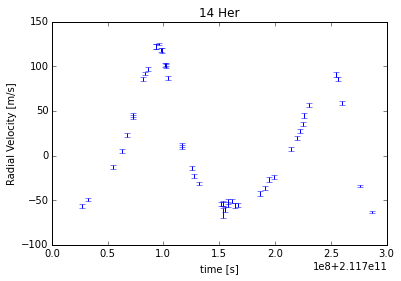

In [5]:
plt.errorbar(time, rv, yerr=rv_err, linestyle="")
plt.xlabel("time [s]")
plt.ylabel("Radial Velocity [m/s]")
plt.title("14 Her")

In [6]:
def RV_equation(t, t_0, P, e, K, V_0, phi):
    theta = rv_helper.time_to_theta(t, t_0, P, e)
    v_r = V_0 + K*(e*np.cos(phi) + np.cos(phi + theta))
    return v_r

In [7]:
initial_params = (time[0],
                  (time.max()-time.min())/2,
                  0,
                  rv.max() - rv.min(),
                  rv.mean(),
                  0)
params, pcov = optimize.curve_fit(RV_equation, time, rv, p0=initial_params, sigma=rv_err)

/Users/egentry/tmp/lamat-2016-solutions/day4/rv_helper.py:42: RuntimeWarning: invalid value encountered in double_scalars
  theta = 2 * np.arctan(((1+e)/(1-e))**.5 * np.tan(etas/2.))


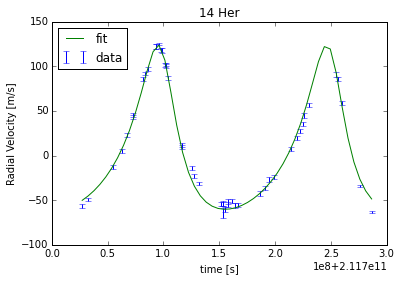

In [8]:
plt.errorbar(time, rv, yerr=rv_err, linestyle="", label="data")
times_synthetic = np.linspace(time[0], time[-1])
plt.plot(times_synthetic, RV_equation(times_synthetic, *params), label="fit")

plt.xlabel("time [s]")
plt.ylabel("Radial Velocity [m/s]")
plt.title("14 Her")
plt.legend(loc="best")


In [9]:
print("Orbital period: {:.2f} days".format(params[1] / (3600*24)))
print("Orbital eccentricity: {:.2f}".format(params[2]))
print("Velocity amplitude: {:.2f} m/s".format(params[3]))

Orbital period: 1749.68 days
Orbital eccentricity: 0.39
Velocity amplitude: 92.07 m/s
